En este bloque importamos todas las librerias a utilizar

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans, MeanShift, DBSCAN
from sklearn.preprocessing import StandardScaler



#from google.colab import drive
#drive.mount('/content/drive')


1:CARGA DE DATOS

En este bloque nos preparamos paera la carga de datos definiendo nuestras rutas.

In [3]:
# ruta lucia
# ruta =

# ruta heber
#ruta=

# ruta viviana
#ruta="/content/drive/MyDrive/BIG_DATA/Crimenes.csv"

# ruta pastor
ruta="C:/Users/pasto/Dropbox/GRUPO-TRABAJO/BigData/Laboratorio3/Crimenes.csv"


Hacemos una previsualizacion para verificar haber cargado correctamente el csv.

In [4]:
df = pd.read_csv(ruta)
df

,Estado,Asesinatos,Asaltos,Poblacion Urbana,Violaciones
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [5]:
X1=df[["Asesinatos",	"Asaltos",	"Poblacion Urbana",	"Violaciones"]]
X1

,Asesinatos,Asaltos,Poblacion Urbana,Violaciones
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


In [6]:
# Escala los datos para que tengan media cero y desviación estándar uno
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X1)

In [7]:
X_scaled

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

c:\Users\pasto\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\pasto\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


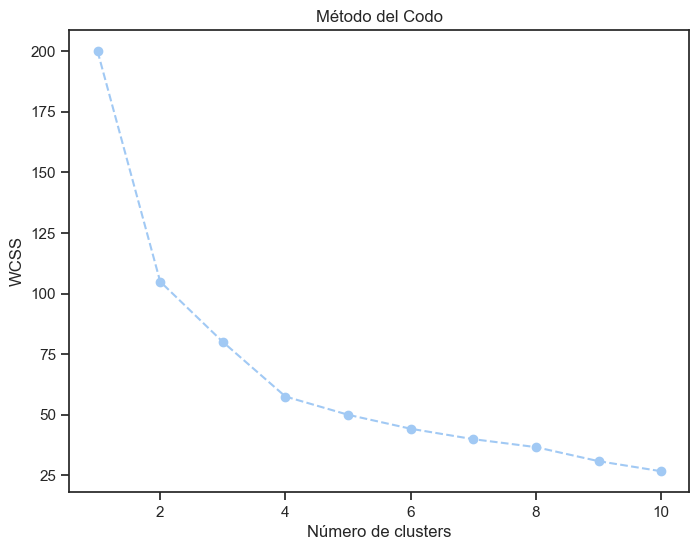

In [8]:
# Encuentra el número óptimo de clusters utilizando el método del codo
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Visualiza el método del codo
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Método del Codo')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')  # Within-Cluster-Sum-of-Squares
plt.show()

In [9]:
# se elige el número óptimo de clusters (k)
k_optimo = 3# ajusta este valor  método del codo

# Aplica KMeans con el número óptimo de clusters
kmeans = KMeans(n_clusters=k_optimo, init='k-means++', max_iter=300, n_init=10, random_state=0)
df['Cluster'] = kmeans.fit_predict(X_scaled)




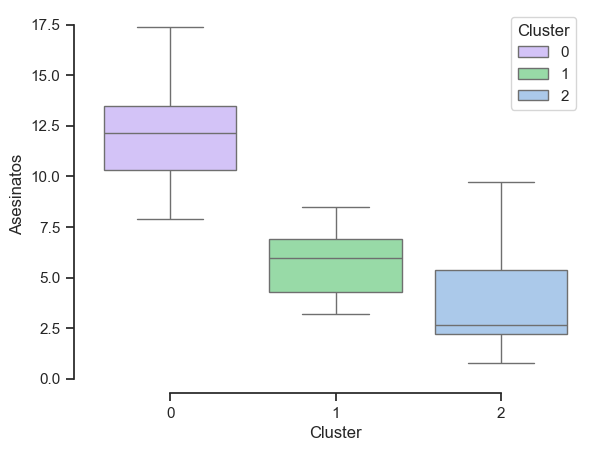

In [21]:
import seaborn as sns


# Load the example tips dataset
#tips = sns.load_dataset("tips")

# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="Cluster", y="Asesinatos",
            hue="Cluster", palette=["m", "g","b"],
            data=df)
sns.despine(offset=10, trim=True)




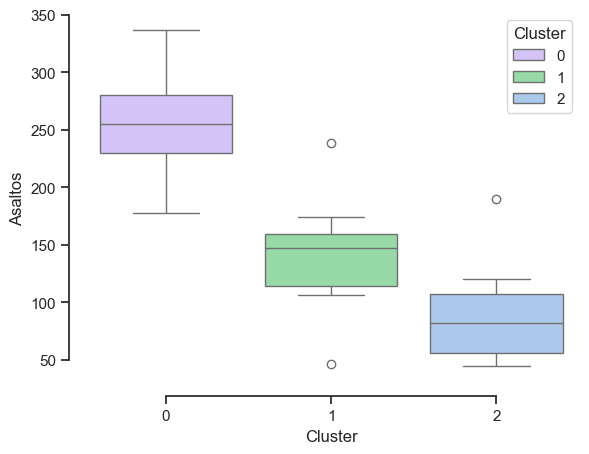

In [18]:
sns.boxplot(x="Cluster", y="Asaltos",
            hue="Cluster", palette=["m", "g","b"],
            data=df)
sns.despine(offset=10, trim=True)

<Axes: xlabel='Cluster', ylabel='Violaciones'>

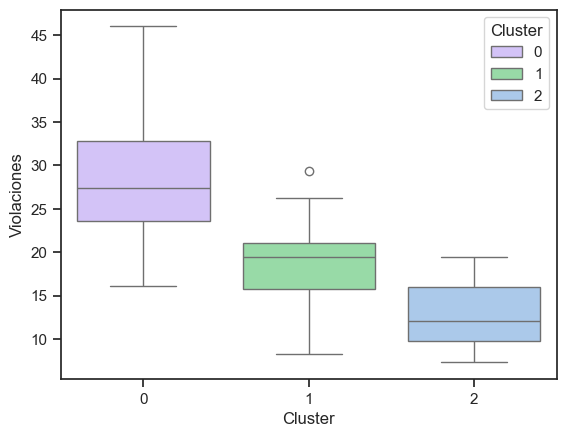

In [20]:

sns.boxplot(x="Cluster", y="Violaciones",
            hue="Cluster", palette=["m", "g","b"],
            data=df)
#sns.despine(offset=10, trim=True)

In [9]:
df

,Estado,Asesinatos,Asaltos,Poblacion Urbana,Violaciones,Cluster
0,Alabama,13.2,236,58,21.2,1
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,2
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,1
6,Connecticut,3.3,110,77,11.1,2
7,Delaware,5.9,238,72,15.8,2
8,Florida,15.4,335,80,31.9,1
9,Georgia,17.4,211,60,25.8,1


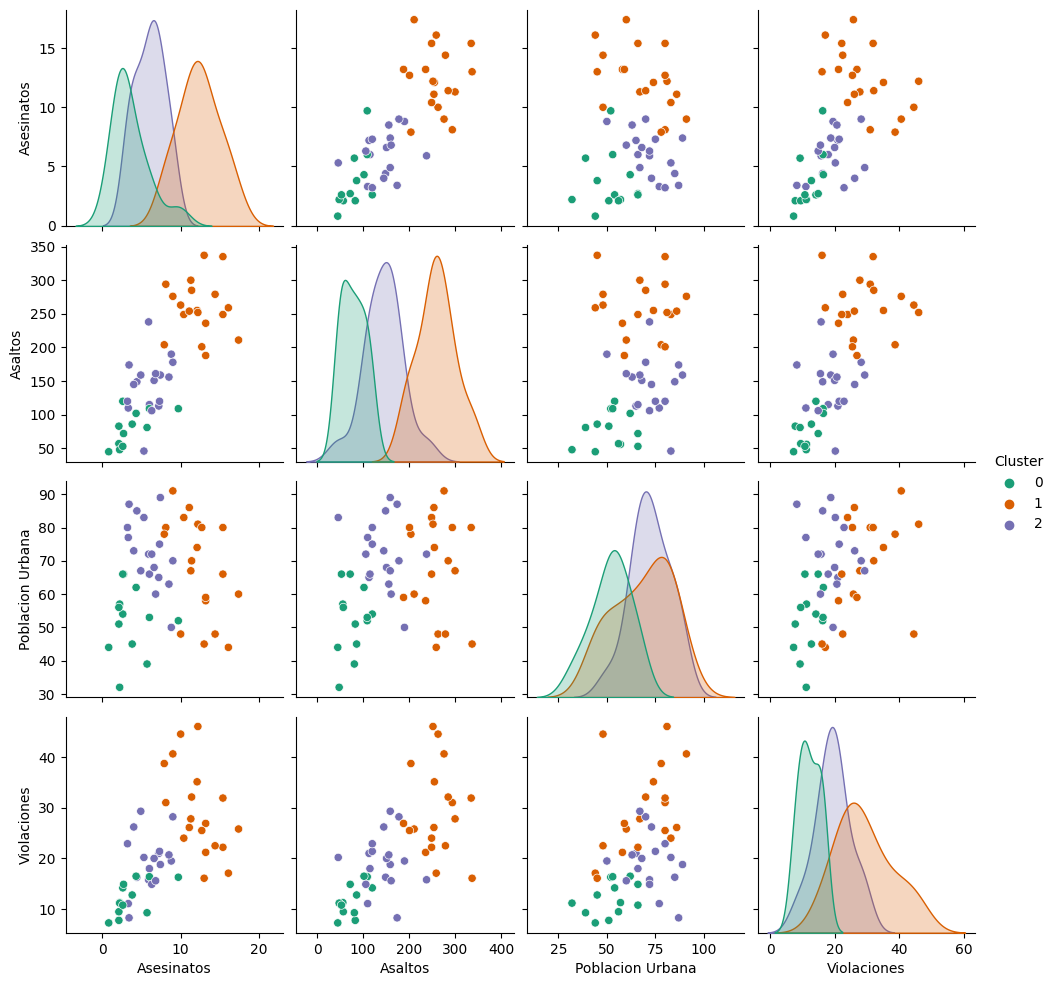

In [10]:
sns.pairplot(data=df, hue='Cluster', palette='Dark2', diag_kind='kde')
plt.show()

In [11]:
X2=df[[	"Asaltos",	"Poblacion Urbana"]]

In [13]:
# Escala los datos para que tengan media cero y desviación estándar uno
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X2)

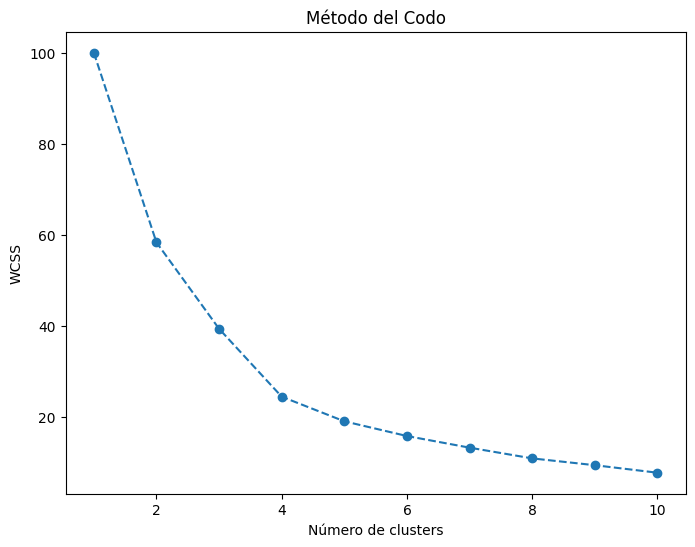

In [14]:
# Encuentra el número óptimo de clusters utilizando el método del codo
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Visualiza el método del codo
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Método del Codo')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')  # Within-Cluster-Sum-of-Squares
plt.show()

In [15]:
# se elige el número óptimo de clusters (k)
k_optimo = 2# ajusta este valor  método del codo

# Aplica KMeans con el número óptimo de clusters
kmeans = KMeans(n_clusters=k_optimo, init='k-means++', max_iter=300, n_init=10, random_state=0)
df['Cluster2'] = kmeans.fit_predict(X_scaled)


In [16]:
df

,Estado,Asesinatos,Asaltos,Poblacion Urbana,Violaciones,Cluster,Cluster2
0,Alabama,13.2,236,58,21.2,1,1
1,Alaska,10.0,263,48,44.5,1,1
2,Arizona,8.1,294,80,31.0,1,1
3,Arkansas,8.8,190,50,19.5,2,0
4,California,9.0,276,91,40.6,1,1
5,Colorado,7.9,204,78,38.7,1,1
6,Connecticut,3.3,110,77,11.1,2,0
7,Delaware,5.9,238,72,15.8,2,1
8,Florida,15.4,335,80,31.9,1,1
9,Georgia,17.4,211,60,25.8,1,1


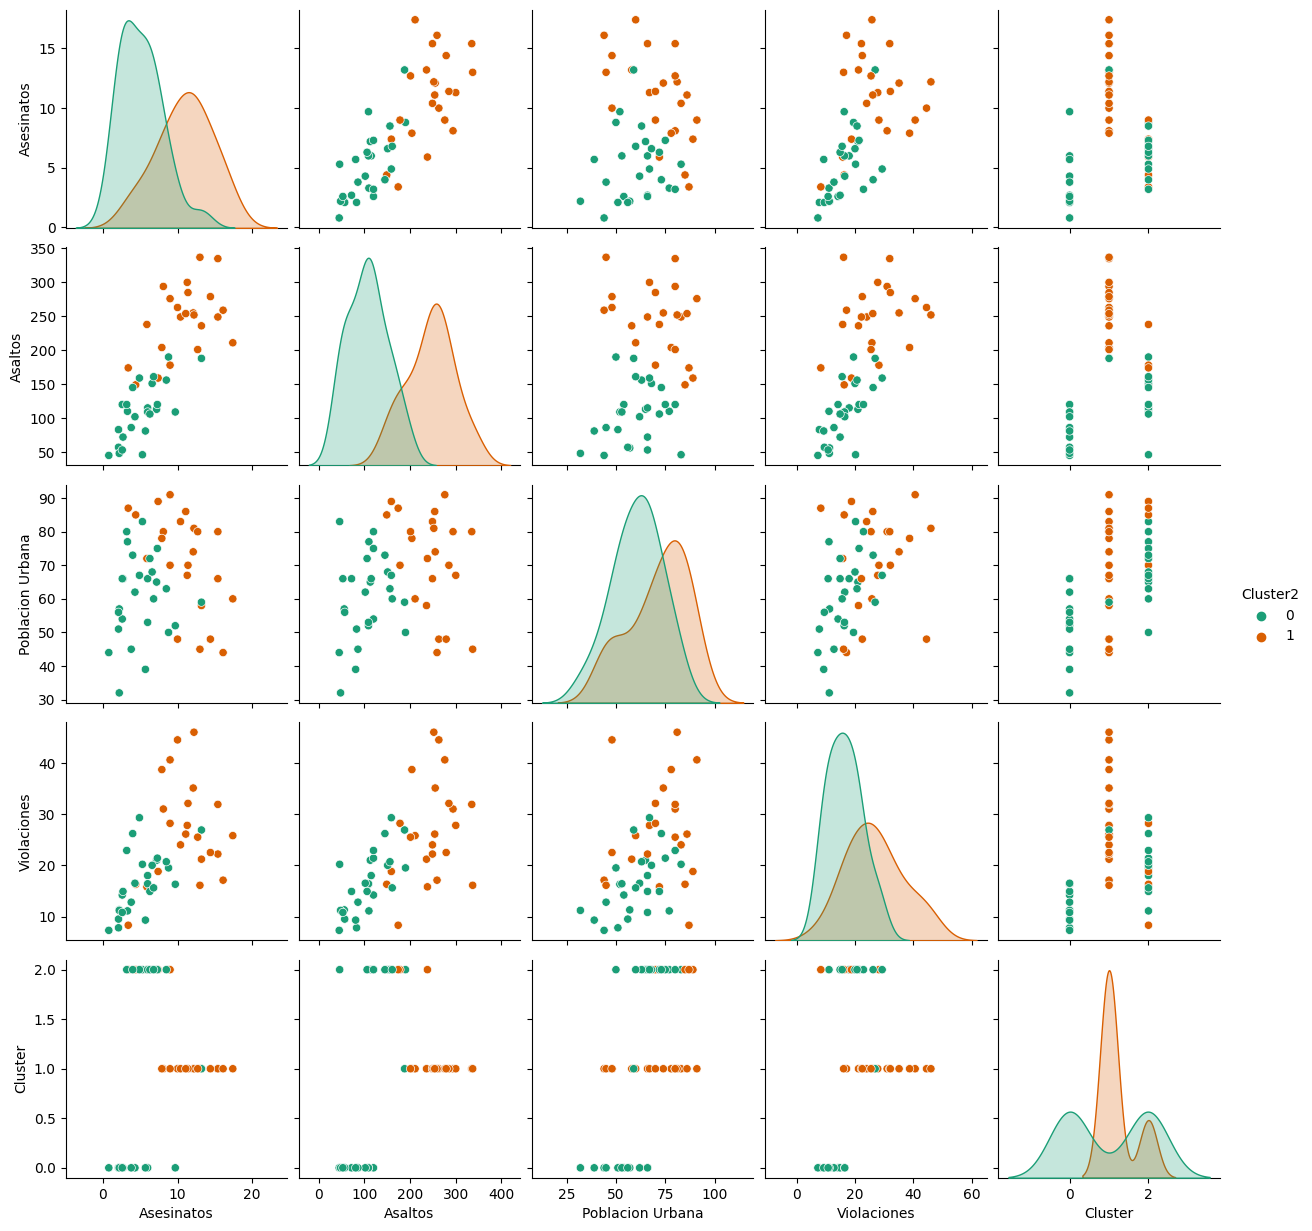

In [17]:
sns.pairplot(data=df, hue='Cluster2', palette='Dark2', diag_kind='kde')
plt.show()

In [28]:
X3=df[["Asesinatos", "Poblacion Urbana"]]

In [29]:
# Escala los datos para que tengan media cero y desviación estándar uno
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X3)

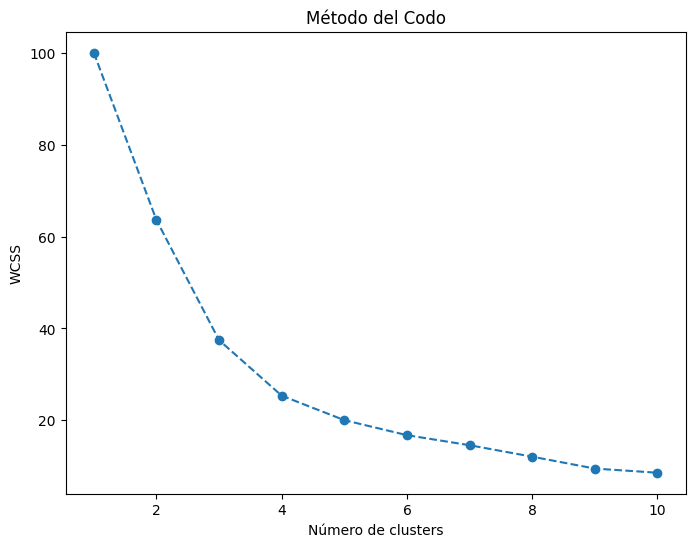

In [31]:
# Encuentra el número óptimo de clusters utilizando el método del codo
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Visualiza el método del codo
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Método del Codo')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')  # Within-Cluster-Sum-of-Squares
plt.show()

In [32]:
# se elige el número óptimo de clusters (k)
k_optimo = 2# ajusta este valor  método del codo

# Aplica KMeans con el número óptimo de clusters
kmeans = KMeans(n_clusters=k_optimo, init='k-means++', max_iter=300, n_init=10, random_state=0)
df['Cluster3'] = kmeans.fit_predict(X_scaled)

In [33]:
df

,Estado,Asesinatos,Asaltos,Poblacion Urbana,Violaciones,Cluster,Cluster2,Cluster3
0,Alabama,13.2,236,58,21.2,1,1,0
1,Alaska,10.0,263,48,44.5,1,1,0
2,Arizona,8.1,294,80,31.0,1,1,0
3,Arkansas,8.8,190,50,19.5,2,0,0
4,California,9.0,276,91,40.6,1,1,0
5,Colorado,7.9,204,78,38.7,1,1,0
6,Connecticut,3.3,110,77,11.1,2,0,1
7,Delaware,5.9,238,72,15.8,2,1,1
8,Florida,15.4,335,80,31.9,1,1,0
9,Georgia,17.4,211,60,25.8,1,1,0


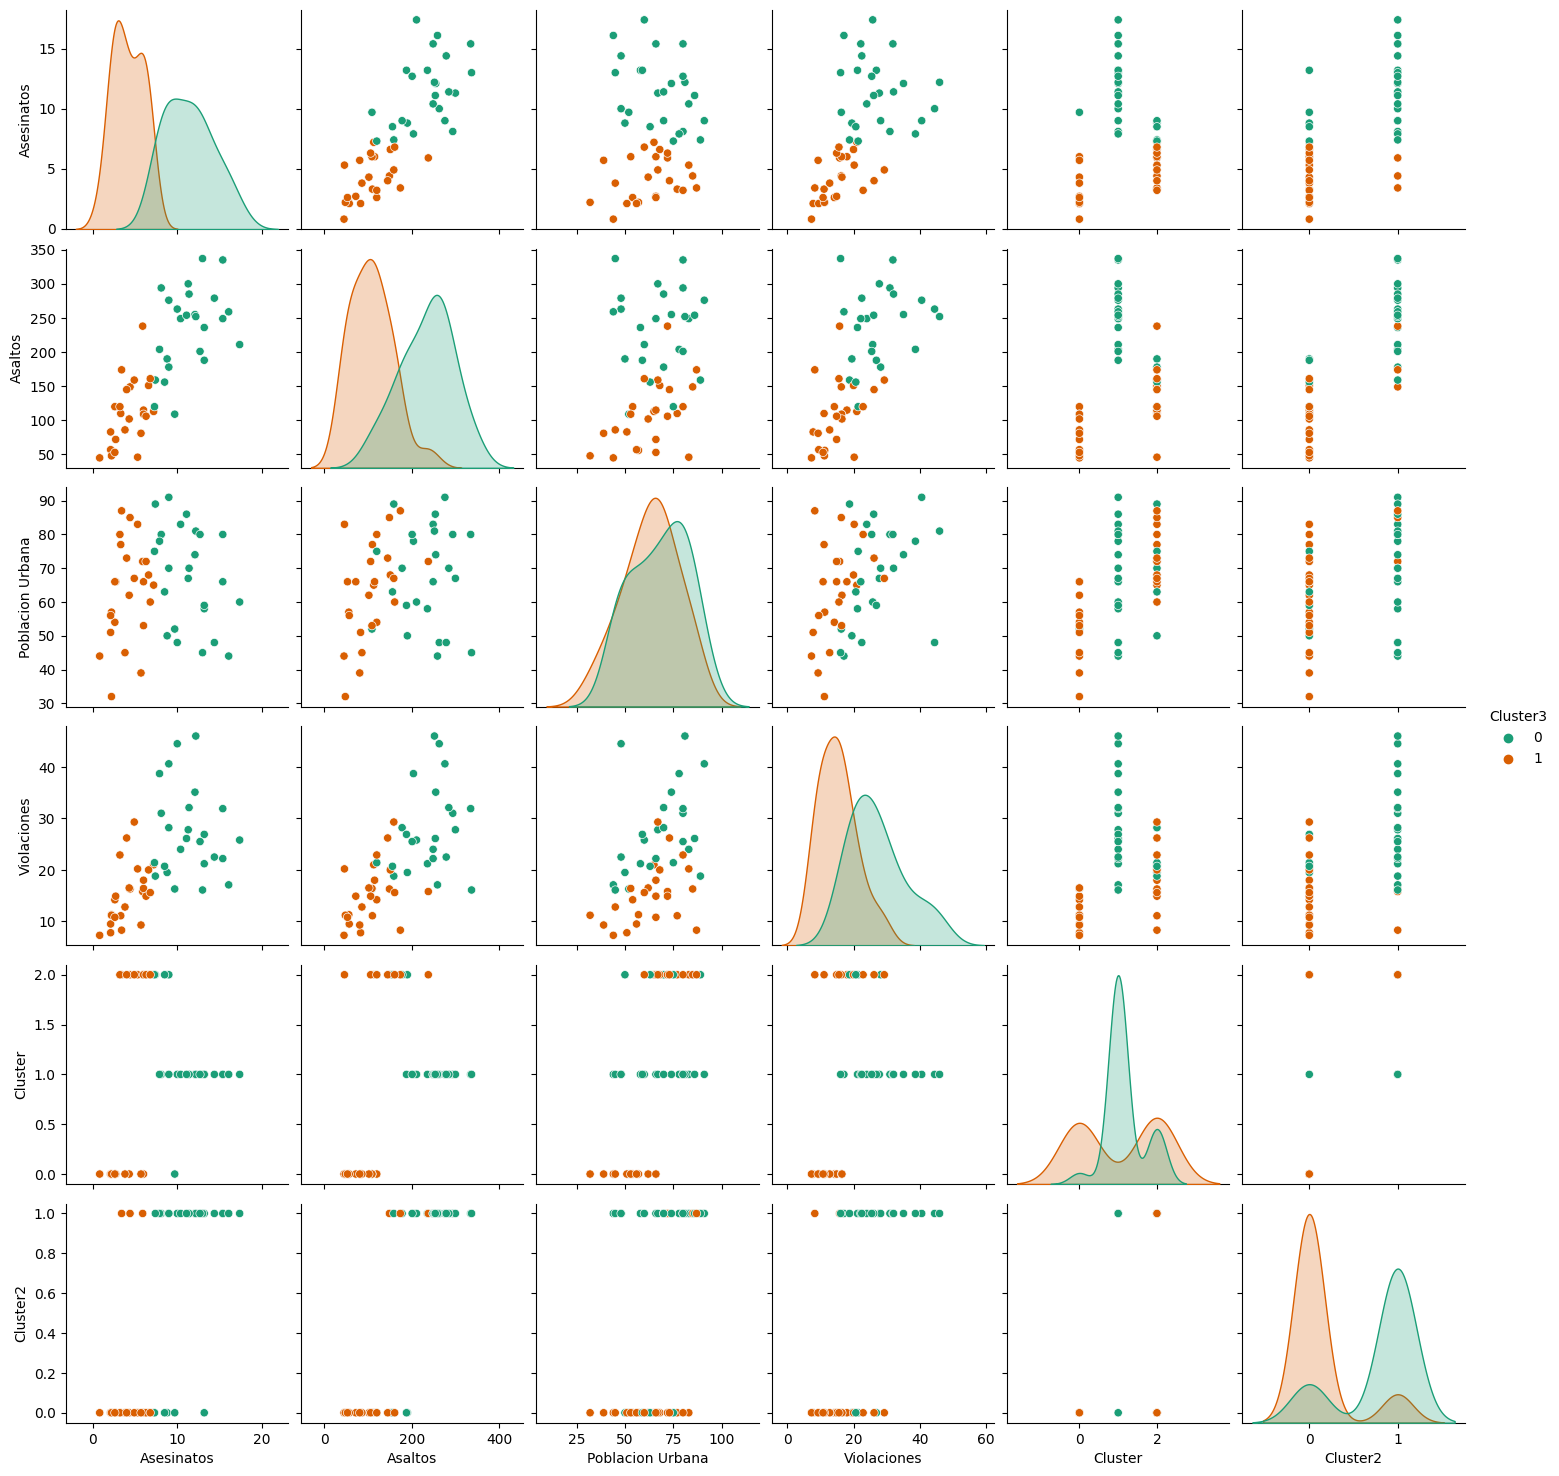

In [34]:
sns.pairplot(data=df, hue='Cluster3', palette='Dark2', diag_kind='kde')
plt.show()

In [35]:
X4=df[["Violaciones", "Poblacion Urbana"]]

In [36]:
# Escala los datos para que tengan media cero y desviación estándar uno
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X4)

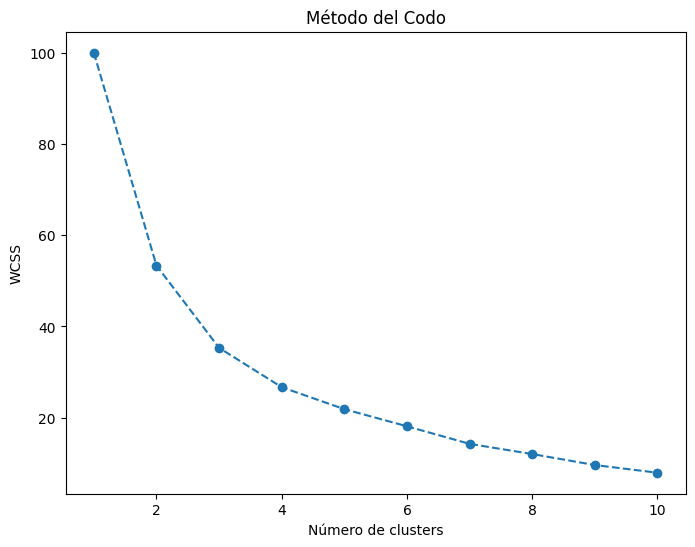

In [37]:
# Encuentra el número óptimo de clusters utilizando el método del codo
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Visualiza el método del codo
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Método del Codo')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')  # Within-Cluster-Sum-of-Squares
plt.show()

In [38]:
# se elige el número óptimo de clusters (k)
k_optimo = 2# ajusta este valor  método del codo

# Aplica KMeans con el número óptimo de clusters
kmeans = KMeans(n_clusters=k_optimo, init='k-means++', max_iter=300, n_init=10, random_state=0)
df['Cluster4'] = kmeans.fit_predict(X_scaled)

In [39]:
df

,Estado,Asesinatos,Asaltos,Poblacion Urbana,Violaciones,Cluster,Cluster2,Cluster3,Cluster4
0,Alabama,13.2,236,58,21.2,1,1,0,0
1,Alaska,10.0,263,48,44.5,1,1,0,1
2,Arizona,8.1,294,80,31.0,1,1,0,1
3,Arkansas,8.8,190,50,19.5,2,0,0,0
4,California,9.0,276,91,40.6,1,1,0,1
5,Colorado,7.9,204,78,38.7,1,1,0,1
6,Connecticut,3.3,110,77,11.1,2,0,1,0
7,Delaware,5.9,238,72,15.8,2,1,1,0
8,Florida,15.4,335,80,31.9,1,1,0,1
9,Georgia,17.4,211,60,25.8,1,1,0,1


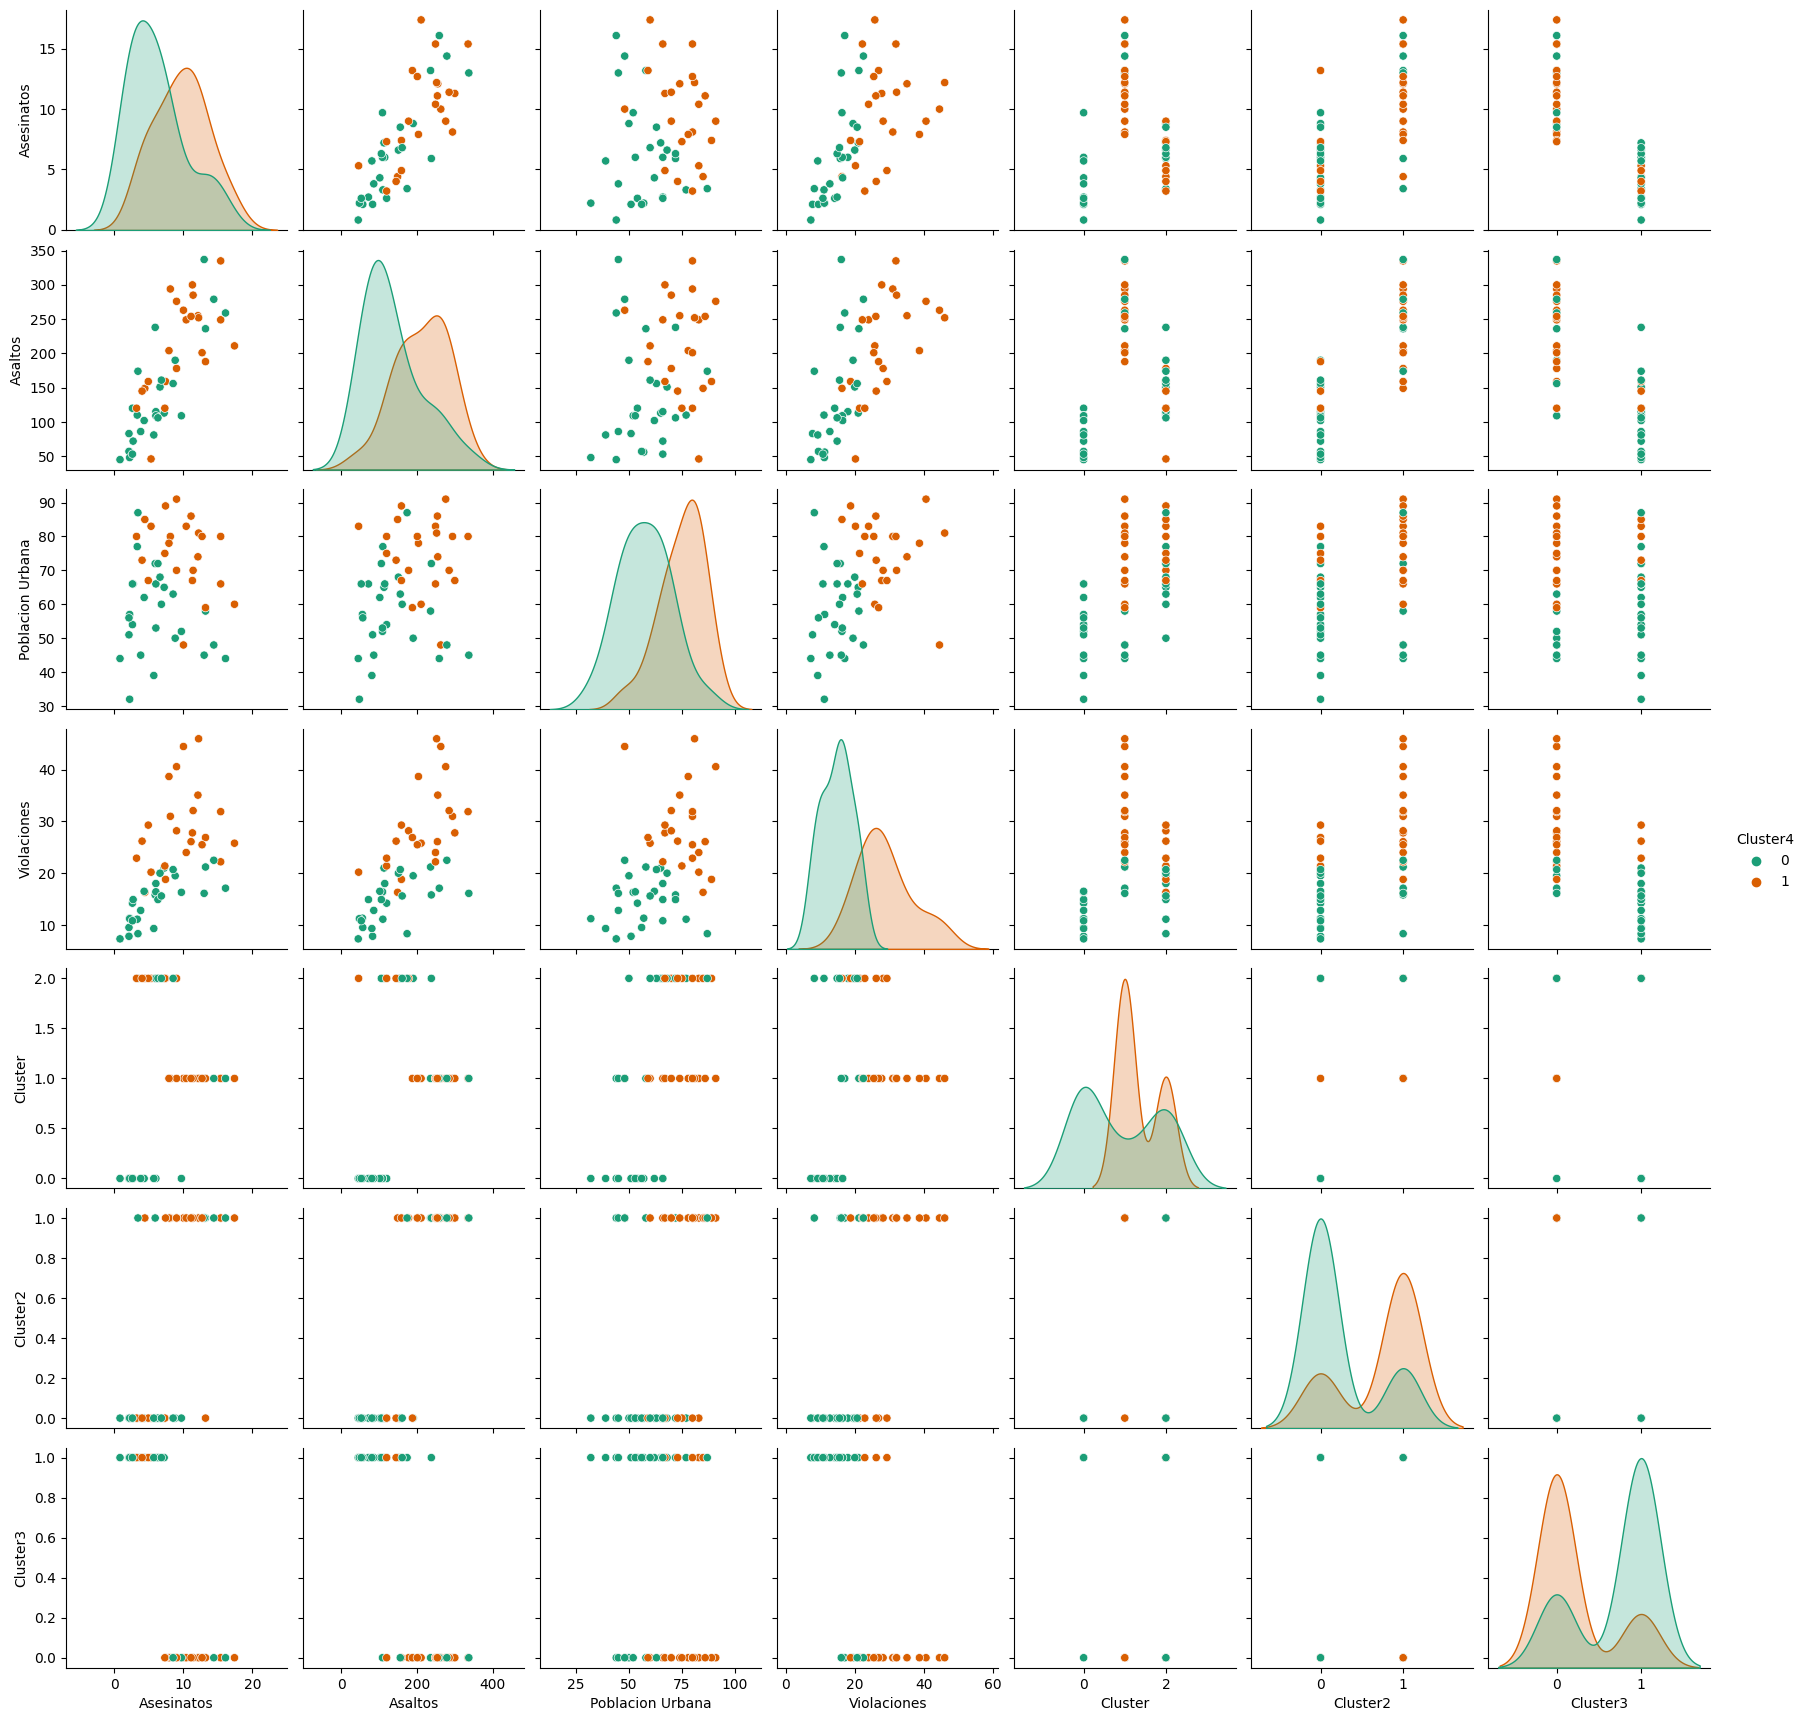

In [40]:
sns.pairplot(data=df, hue='Cluster4', palette='Dark2', diag_kind='kde')
plt.show()